### DATA LOAD

In [40]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train.csv")
df.tail(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,Green,0,1600,5,4,5,19,1114,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [2]:
dfy = df.ix[:, :3]
dfX = df.ix[:, 3:]
print(len(dfy.columns), len(dfX.columns))

3 36


#### SPLIT DFX TO REAL AND CATEGORICAL VALUE

In [16]:
# 7개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
# 29개 변수
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

print(len(cols_real), len(cols_cat))

7 29


In [17]:
dfX_real = dfX[cols_real]
dfX_cat = dfX[cols_cat]

print(len(dfX_real.columns), len(dfX_cat.columns))

7 29


---

### CORRELATION MATRIX & CORRELATION COEFFICIENT
- only for real variables
- correlation coefficient with y ( Price )
 - `Age_08_04 : -0.88`
 - `Mfg_Year : 0.89`
 - `KM : -0.58`
 - `HP : 0.31`
 - `Quarterly_Tax : 0.18`
 - `Weight : 0.56`
 - `Guarantee_Period : 0.17`

In [62]:
df = pd.concat([dfy.Price, dfX_real], axis=1)
df.head()

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,2002,46986,90,210,1165,3
1,13750,23,2002,72937,90,210,1165,3
2,13750,30,2002,38500,90,210,1170,3
3,20950,25,2002,31461,192,100,1185,12
4,19600,25,2002,32189,192,100,1185,3


In [63]:
# Correlation Matrix of dfX_real
corrmat = df.corr()
corrmat

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
Price,1.000000,-0.883900,0.893302,-0.575962,0.314898,0.178874,0.557015,0.166141
Age_08_04,-0.883900,1.000000,-0.984218,0.516486,-0.164049,-0.172089,-0.463990,-0.166382
Mfg_Year,0.893302,-0.984218,1.000000,-0.517981,0.170122,0.173047,0.471215,0.160928
KM,-0.575962,0.516486,-0.517981,1.000000,-0.350617,0.289799,-0.011154,-0.136274
HP,0.314898,-0.164049,0.170122,-0.350617,1.000000,-0.324570,0.078747,0.090731
Quarterly_Tax,0.178874,-0.172089,0.173047,0.289799,-0.324570,1.000000,0.585494,-0.156661
Weight,0.557015,-0.463990,0.471215,-0.011154,0.078747,0.585494,1.000000,0.001592
Guarantee_Period,0.166141,-0.166382,0.160928,-0.136274,0.090731,-0.156661,0.001592,1.000000


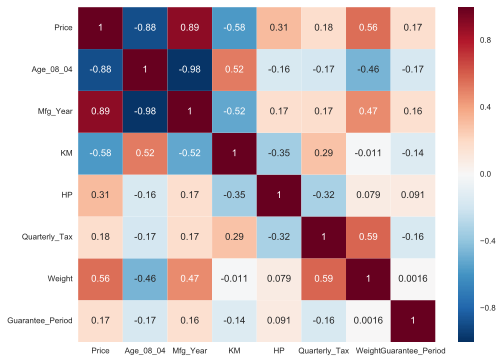

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)

#### CHECK CORRELATION COEFFICIENT WITH P-VLAUE
- all coefficients between y and X are fine

In [80]:
def check_pearsonr(y, X):
    result = sp.stats.pearsonr(y, X)
    print("rho : {}  ,  p-value : {}".format(result[0], result[1]))

In [81]:
check_pearsonr(df.Price, df.Age_08_04)

rho : -0.8838999759614311  ,  p-value : 0.0


In [82]:
check_pearsonr(df.Price, df.Mfg_Year)

rho : 0.8933019763297112  ,  p-value : 0.0


In [83]:
check_pearsonr(df.Price, df.KM)

rho : -0.5759618521644574  ,  p-value : 4.2103663413920063e-91


In [84]:
check_pearsonr(df.Price, df.HP)

rho : 0.31489825814758804  ,  p-value : 6.828503623706392e-25


In [85]:
check_pearsonr(df.Price, df.Quarterly_Tax)

rho : 0.17887374583572183  ,  p-value : 8.956625863366135e-09


In [86]:
check_pearsonr(df.Price, df.Weight)

rho : 0.5570148710526482  ,  p-value : 4.179398149858485e-84


In [87]:
check_pearsonr(df.Price, df.Guarantee_Period)

rho : 0.16614089142820712  ,  p-value : 9.601091933171701e-08


#### BUT 
- correlation between `Age_08_04` and `Mfg_Year` is too strong ( strong correlation within X variables )
- so we need to handle these whether remove one or merge
- because it could be generate multicollinearity

In [88]:
check_pearsonr(df.Age_08_04, df.Mfg_Year)

rho : -0.9842181751617192  ,  p-value : 0.0


- and `KM` too

In [89]:
check_pearsonr(df.Age_08_04, df.KM)

rho : 0.5164863684775499  ,  p-value : 1.452674793893053e-70


In [90]:
check_pearsonr(df.Mfg_Year, df.KM)

rho : -0.5179806156884108  ,  p-value : 4.95313980028576e-71


---

### T-TEST ( INDEPENDENT TWO SAMPLE )
- only for categorical variables

In [93]:
df = pd.concat([dfy.Price, dfX_cat], axis=1)
df.head()

,Price,CC,Doors,Cylinders,Gears,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,2000,3,4,5,10,Diesel,1,Blue,0,0,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,13750,2000,3,4,5,10,Diesel,1,Silver,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,13750,2000,3,4,5,3,Diesel,0,Black,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
3,20950,1800,3,4,6,8,Petrol,0,Silver,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0
4,19600,1800,3,4,6,8,Petrol,0,Red,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0


#### CHECK UNIQUE VALUES IN CATEGORICAL VARIABLES
- remove `Cylinders` feature

In [128]:
for col in dfX_cat.columns:
    print("%-17s : %s" % (col, df[col].unique()))

CC                : [ 2000  1800  1600  1400  1598 16000  1995  1900  1300  1398  1332  1587]
Doors             : [3 5 4 2]
Cylinders         : [4]
Gears             : [5 6]
Mfg_Month         : [10  3  8  2  5  9  4  6  7  1 11 12]
Fuel_Type         : ['Diesel' 'Petrol' 'CNG']
Met_Color         : [1 0]
Color             : ['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet'
 'Beige']
Automatic         : [0 1]
Mfr_Guarantee     : [0 1]
BOVAG_Guarantee   : [1 0]
ABS               : [1 0]
Airbag_1          : [1 0]
Airbag_2          : [1 0]
Airco             : [0 1]
Automatic_airco   : [0 1]
Boardcomputer     : [1 0]
CD_Player         : [0 1]
Central_Lock      : [1 0]
Powered_Windows   : [1 0]
Power_Steering    : [1 0]
Radio             : [0 1]
Mistlamps         : [0 1]
Sport_Model       : [0 1]
Backseat_Divider  : [1 0]
Metallic_Rim      : [0 1]
Radio_cassette    : [0 1]
Parking_Assistant : [0 1]
Tow_Bar           : [0 1]


In [155]:
df = df.drop('Cylinders', axis=1)

#### T-TEST BASIC CODE

In [387]:
tmp_list = df['Airco'].unique()
tmp_list

array([0, 1])

In [388]:
a = df['Price'][df['Airco'] == tmp_list[0]]
b = df['Price'][df['Airco'] == tmp_list[1]]

sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-15.816105021217785, pvalue=1.5260436415245136e-50)

#### F-TEST(ANOVA ONE WAY) BASIC CODE

In [389]:
tmp_list = df['Doors'].unique()
tmp_list

array([3, 5, 4, 2])

In [390]:
a = df['Price'][df['Doors'] == tmp_list[0]]
b = df['Price'][df['Doors'] == tmp_list[1]]
c = df['Price'][df['Doors'] == tmp_list[2]]
d = df['Price'][df['Doors'] == tmp_list[3]]

In [391]:
sp.stats.f_oneway(a, b, c, d)

F_onewayResult(statistic=13.157426161496677, pvalue=1.9673598160670142e-08)

#### BOXPLOT & T-TEST
- only for variables that have two class (tow unique values)

##### There are SIGNIFICANT DIFFERENCES
```
Met_Color ( p-val = .0000 )
Mfr_Guarantee ( p-val = .0000 )
ABS ( p-val = .0000 )
Airbag_1 ( p-val = .0023 )
Airbag_2 ( p-val = .0000 )
Airco ( p-val = .0000 )
Automatic_airco ( p-val = .0000 )
Boardcomputer ( p-val = .0000 )
CD_Player ( p-val = .0000 )
Central_Lock ( p-val = .0000 )
Powered_Windows ( p-val = .0000 )
Radio ( p-val = .4489 )
Mistlamps ( p-val = .0000 )
Sport_Model ( p-val = .0000 )
Backseat_Divider ( p-val = .0096 )
Metallic_Rim ( p-val = .0000 )
Tow_Bar ( p-val = .0000 )
```
##### There aren't SIGNIFICANT DIFFERENCES ( better not to consider these features )
```
Automatic ( p-val = .0298 )
BOVAG_Guarantee ( p-val = .2573 )
Power_Steering ( p-val = .0382 )
Radio_cassette ( p-val = .4342 )
Parking_Assistant ( p-val = .1531 )
Gears ( p-val = .0880 )
```

In [530]:
def box_and_ttest(feature):        
    tmp_list = df[feature].unique()
    
    if len(tmp_list) == 2:
        result = sp.stats.ttest_ind(df['Price'][df[feature] == tmp_list[0]], 
                                    df['Price'][df[feature] == tmp_list[1]])
        statistics = result[0]
        pvalue = result[1]
        
        print(result)
        
    else:
        pass
    
    with plt.style.context(('seaborn-white')):
        plt.figure(figsize=(4,3))
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")
        plt.title("t-statistics : %.4f, p-value : %.8f" % (statistics, pvalue))

Ttest_indResult(statistic=-1.7072063434480571, pvalue=0.088088936482953129)


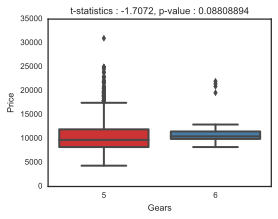

In [531]:
box_and_ttest("Gears")

Ttest_indResult(statistic=4.9321888011522619, pvalue=9.4929692835439989e-07)


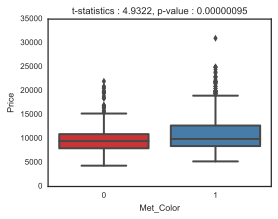

In [532]:
box_and_ttest("Met_Color")

Ttest_indResult(statistic=-2.175595606130607, pvalue=0.029815204892556121)


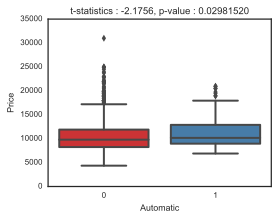

In [533]:
box_and_ttest("Automatic")

In [584]:
def five_boxes_and_ttests(*args):
    
    with plt.style.context(('seaborn-white')):
        plt.subplots(1, 5, figsize=(12, 2.5), sharey=True)
        
        for i, arg in enumerate(args):
            tmp_list = df[arg].unique()
            result = sp.stats.ttest_ind(df['Price'][df[arg] == tmp_list[0]], 
                                        df['Price'][df[arg] == tmp_list[1]])
            statistics = result[0]
            pvalue = result[1]

            plt.subplot(1, 5, i+1)
            sns.boxplot(x=dfX[arg], y=dfy['Price'], palette="Set3")
            plt.title("t : %.4f, p-val : %.4f" % (statistics, pvalue))
            plt.yticks([])

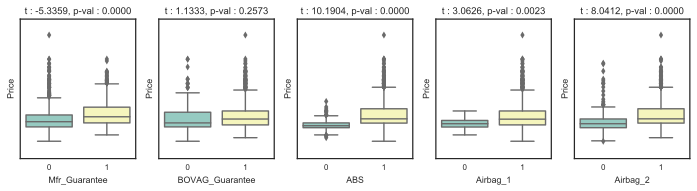

In [585]:
five_boxes_and_ttests("Mfr_Guarantee", "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2")

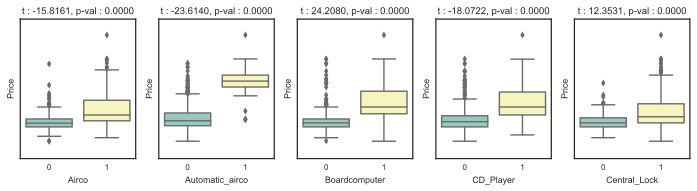

In [586]:
five_boxes_and_ttests("Airco", "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock")

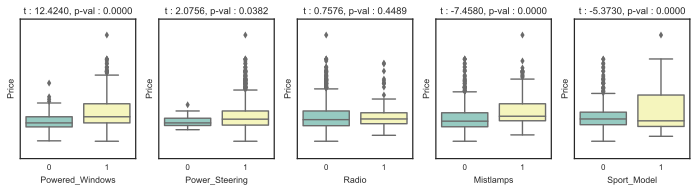

In [587]:
five_boxes_and_ttests("Powered_Windows", "Power_Steering", "Radio", "Mistlamps", "Sport_Model")

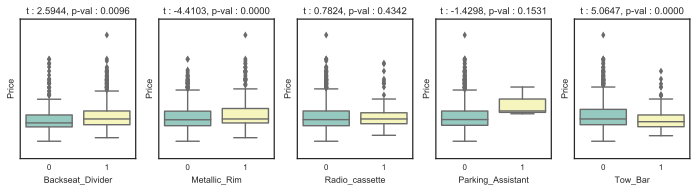

In [588]:
five_boxes_and_ttests("Backseat_Divider", "Metallic_Rim", "Radio_cassette", "Parking_Assistant", "Tow_Bar")

#### BOXPLOT & F-TEST(ONEWAY)

```
CC                : [ 2000 1800 1600 1400 1598 16000 1995 1900 1300 1398 1332 1587]
Doors             : [3 5 4 2]
Mfg_Month         : [10  3  8  2  5  9  4  6  7  1 11 12]
Fuel_Type         : ['Diesel' 'Petrol' 'CNG']
Color             : ['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet' 'Beige']
```

In [597]:
def get_array(feature):
    tmp_list = df[feature].unique()
    
    for i in range(len(tmp_list)):
        exec("arr_%d = df['Price'][df[feature] == %d].values" % (i+1, tmp_list[i]))
    
    print("[%s] feature has 1 ~ %d array" % (feature, len(tmp_list)+1))

In [589]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")

In [598]:
get_array('CC')

[CC] feature has 1 ~ 13 array


NameError: name 'arr_6' is not defined

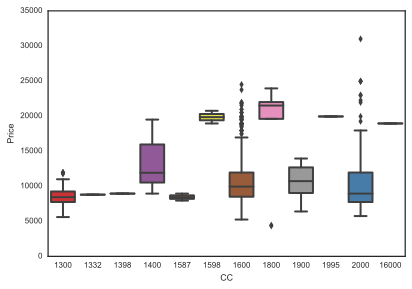

In [595]:
display_boxplot('CC')
print(sp.stats.f_oneway(arr_1, arr_2, arr_3, arr_4, arr_5, arr_6, arr_7, arr_8, arr_9, arr_10, arr_11, arr_12, arr_13))